In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

#  Load the Dataset

In [2]:
df = pd.read_csv("Heart_Disease_Prediction.csv")

In [3]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


# Exploratory Data Analysis (EDA)

In [4]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [5]:
#cheking for null value
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [6]:
#duplicates
df.duplicated().sum()

0

In [7]:
df.shape

(270, 14)

In [8]:
#age column
df["Age"].min(), df["Age"].max()

(29, 77)

# Visualizations

<Axes: xlabel='Age', ylabel='Count'>

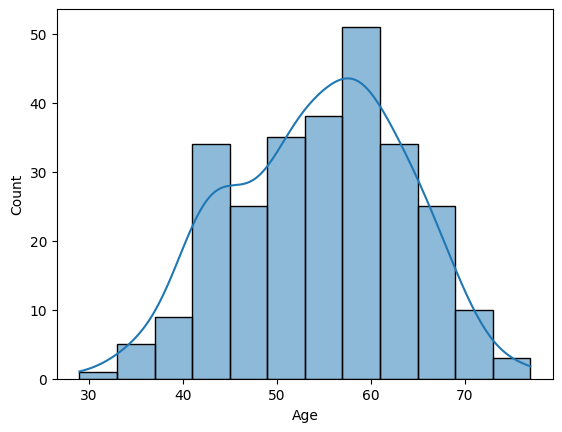

In [9]:
# Plot the histogram
sns.histplot(df['Age'], kde=True)

<Axes: xlabel='Age', ylabel='Heart Disease'>

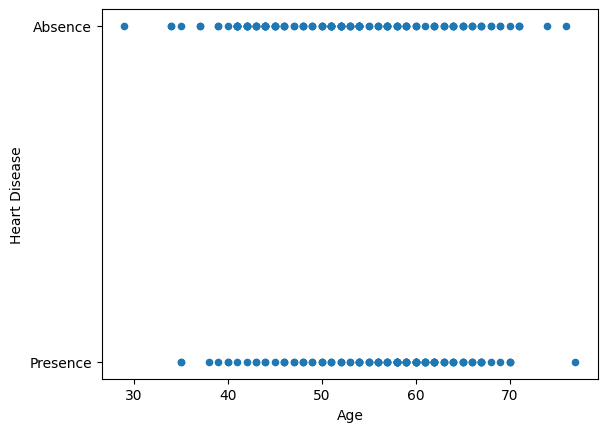

In [11]:
df.plot.scatter("Age","Heart Disease")

In [12]:
#This graph helps visualize if there is a trend or pattern in how heart disease is distributed among different ages. If a trend exists, it might suggest that older individuals are more likely to have heart disease, but further analysis (e.g., histograms, logistic regression) would be required for confirmation.

<Axes: ylabel='Frequency'>

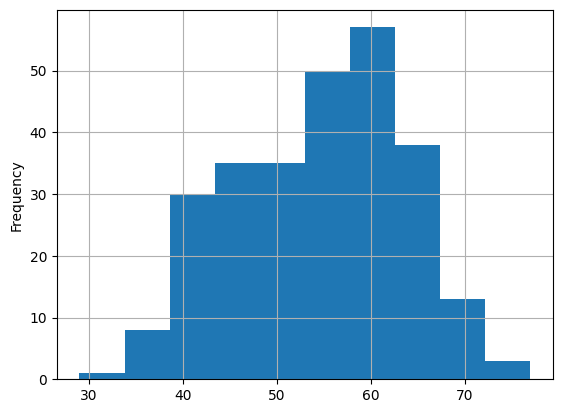

In [18]:
df.Age.plot.hist(bins=10, grid = True)

In [21]:
df["Sex"].value_counts()

Sex
1    183
0     87
Name: count, dtype: int64

In [22]:
# Find the values count of age column grouping by sex column
df.groupby('Sex')['Age'].value_counts()

Sex  Age
0    62     7
     54     5
     60     5
     41     4
     51     4
           ..
1    29     1
     34     1
     37     1
     38     1
     77     1
Name: count, Length: 73, dtype: int64

## Exploring CP (Chest Pain) column

In [40]:
#df.head()

In [41]:
# value count of cp column
df['Chest pain type'].value_counts()

Chest pain type
4    129
3     79
2     42
1     20
Name: count, dtype: int64

<Axes: xlabel='Chest pain type', ylabel='count'>

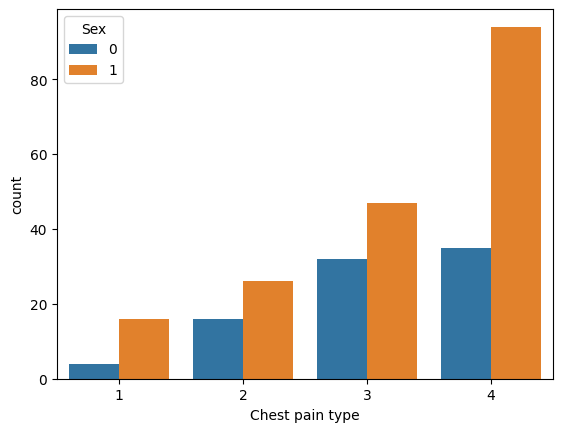

In [42]:
# count plot of cp column by sex column
sns.countplot(df, x='Chest pain type', hue= 'Sex')

## Handling Null values

In [43]:
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

There is no null value

## Handling Outliers

<Axes: >

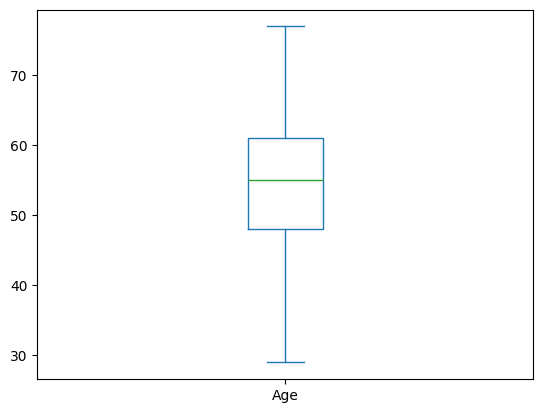

In [44]:
df.Age.plot.box()

### Using IQR

In [45]:
Q1 = df.Age.quantile(q = 0.25)
Q3 = df.Age.quantile(q = 0.75)
IQR = Q3 -Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

print(upper_limit, lower_limit)

80.5 28.5


In [46]:
df["Age"].min(), df["Age"].max()

(29, 77)

The values 80.5 and 28.5 are the upper and lower bounds calculated using the Interquartile Range (IQR) method.
since all the values in dataset is in between 80.5 28.5, there is no outliers.

In [47]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [48]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


## Encoding

#### Encoding Categorical column

In [50]:
df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})


In [52]:
df['Heart Disease'].unique()

array([1, 0], dtype=int64)

In [53]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


#### Encoding  Categorical Columns

In [54]:
df = pd.get_dummies(df, columns=['Thallium'], prefix='Thallium')

In [55]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Heart Disease,Thallium_3,Thallium_6,Thallium_7
0,70,1,4,130,322,0,2,109,0,2.4,2,3,1,True,False,False
1,67,0,3,115,564,0,2,160,0,1.6,2,0,0,False,False,True
2,57,1,2,124,261,0,0,141,0,0.3,1,0,1,False,False,True
3,64,1,4,128,263,0,0,105,1,0.2,2,1,0,False,False,True
4,74,0,2,120,269,0,2,121,1,0.2,1,1,0,True,False,False


## Normalize Numerical Columns

In [56]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

continuous_cols = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

# Standardization (Z-score normalization)
scaler = StandardScaler()
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

# Min-Max Scaling (normalize to [0,1])
# scaler = MinMaxScaler()
# df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

In [57]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Heart Disease,Thallium_3,Thallium_6,Thallium_7
0,1.712094,1,4,-0.075410,1.402212,0,2,-1.759208,0,1.181012,2,3,1,True,False,False
1,1.382140,0,3,-0.916759,6.093004,0,2,0.446409,0,0.481153,2,0,0,False,False,True
2,0.282294,1,2,-0.411950,0.219823,0,0,-0.375291,0,-0.656118,1,0,1,False,False,True
3,1.052186,1,4,-0.187590,0.258589,0,0,-1.932198,1,-0.743600,2,1,0,False,False,True
4,2.152032,0,2,-0.636310,0.374890,0,2,-1.240239,1,-0.743600,1,1,0,True,False,False


## Modeling


In [58]:
#Divide the data into training and testing sets to evaluate model performance:
from sklearn.model_selection import train_test_split

X = df.drop('Heart Disease', axis=1)  # Features
y = df['Heart Disease']               # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [59]:
print(y.value_counts())  # e.g., 60% "Presence" vs. 40% "Absence"

Heart Disease
0    150
1    120
Name: count, dtype: int64


#### Train a Model

LogisticRegression(class_weight='balanced')

#### Linear Regression

In [68]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [69]:
print(f"y = {lin_reg.intercept_} + {lin_reg.coef_[0]} x") 

y = -0.24326255451100698 + 0.0031292551609038615 x


In [70]:
y_pred = lin_reg.predict(X_test)
y_pred

array([ 0.02876251,  0.23738081,  0.0827312 ,  0.82024892,  0.39586906,
        0.16027674,  0.15480872,  0.96770191,  0.58034738,  0.58578921,
        0.30462894,  0.52343733,  0.19019211,  0.96268506,  0.60531718,
        0.83417943, -0.09614057,  0.99274258, -0.0368694 ,  0.74140782,
        0.14344008,  0.91618325,  0.06963165,  0.31387447,  0.22590277,
        0.99366494,  0.2432389 ,  0.32467868,  0.10005273,  0.97449037,
        0.19455155,  1.06389312,  0.6887059 ,  0.52649886, -0.12970697,
        0.33771087,  1.04822026,  0.06882242,  0.45124491,  0.23216609,
        0.97222443,  0.16066811,  0.61941952,  0.86822062,  0.67385972,
       -0.06429755,  0.58259633,  1.07888223,  0.81237863,  0.55176567,
        1.07871   ,  1.14180562,  0.30479119,  0.82564193])

#### Performance Metrics

In [71]:
from sklearn.metrics import max_error, mean_squared_error, mean_absolute_error, r2_score

In [72]:
max_error(y_test, y_pred)

0.9744903658437989

In [73]:
mean_squared_error(y_test, y_pred)

0.13133563164317538

In [74]:
mean_absolute_error(y_test, y_pred)

0.27195620692572015

#### R2 Coffiecient

In [75]:
r2_score(y_test, y_pred)

0.46809069184513974

#### Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.8518518518518519
Precision: 0.7857142857142857
Recall: 0.9166666666666666
F1 Score: 0.8461538461538461
ROC AUC: 0.8583333333333333


#### Optimize model parameters using cross-validation (e.g., GridSearchCV):

In [78]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

E:\pythonds\dsenv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "E:\pythonds\dsenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\pythonds\dsenv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\pythonds\dsenv\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver = _check_solver(self.solver, se

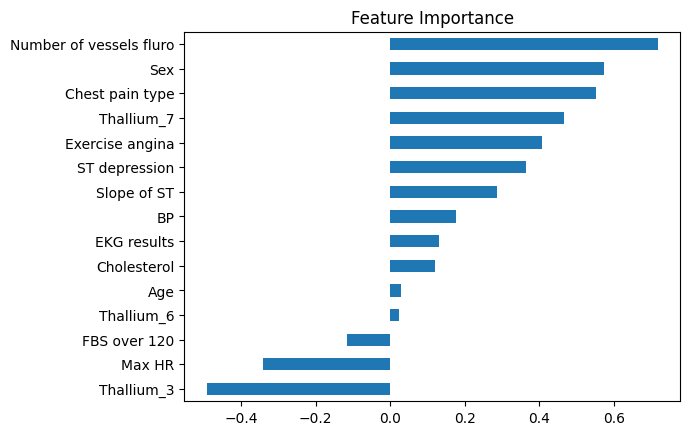

In [79]:
import matplotlib.pyplot as plt

feature_importance = pd.Series(best_model.coef_[0], index=X.columns)
feature_importance.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()

## Neural Network

Use Keras to create a simple NN with:

1. Input layer: Size = number of features.

2. Hidden layer: 16 neurons (ReLU activation).

3. Output layer: 1 neuron (Sigmoid for binary classification).

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(16, activation="relu", input_shape=(X_train.shape[1],)),  # Hidden layer
    Dense(1, activation="sigmoid")                                 # Output layer
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

E:\pythonds\dsenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


####  Train the Model
Train with early stopping to avoid overfitting:

In [81]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.3775 - loss: 0.9869 - val_accuracy: 0.3864 - val_loss: 0.9738
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4009 - loss: 0.9154 - val_accuracy: 0.3636 - val_loss: 0.9239
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4288 - loss: 0.8366 - val_accuracy: 0.3636 - val_loss: 0.8776
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4436 - loss: 0.8152 - val_accuracy: 0.3636 - val_loss: 0.8352
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4182 - loss: 0.7884 - val_accuracy: 0.3864 - val_loss: 0.8005
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4486 - loss: 0.7535 - val_accuracy: 0.4318 - val_loss: 0.7673
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4861 - loss: 0.7149 - val_accuracy: 0.4318 - val_loss: 0.7375
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5344 - loss: 0.6987 - val_accuracy: 0.4545 - val_loss:

#### Evaluate Performance
Check accuracy, precision, recall, and ROC-AUC:

In [82]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary

print("Classification Report:")
print(classification_report(y_test, y_pred))

print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_prob):.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        30
           1       0.73      0.79      0.76        24

    accuracy                           0.78        54
   macro avg       0.78      0.78      0.78        54
weighted avg       0.78      0.78      0.78        54

ROC-AUC Score: 0.86


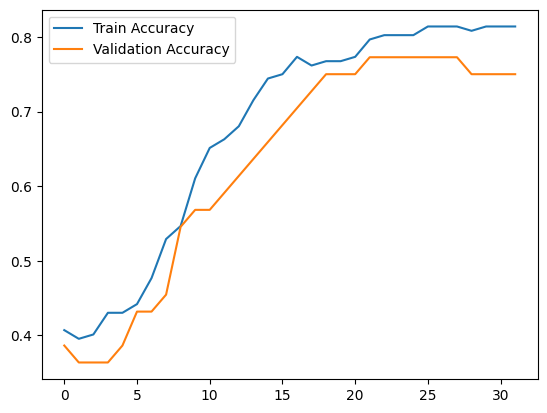

In [84]:

plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()